In [1]:
from utilities import *

raw_data = pd.read_excel("data/Datos_Market_copy.xlsx")

sa = SalesAnalysis(raw_data)

data = sa.data[sa.brand35]

data.set_index("date", inplace=True)

print(data.head())

/Users/oscarjimenezbou/Documents/TFG_ADE/code/TFG/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


            volume.sales  unit.sales  value.sales    supermarket    variant  \
date                                                                          
2021-01-31     11116.952       44038     36482.70  supermarket-A  flavoured   
2021-01-31      1043.550        3865      5584.71  supermarket-B      vegan   
2021-01-31     25131.110       97763     62966.08  supermarket-C  flavoured   
2021-01-31     39222.050       85714     85682.92  supermarket-B      light   
2021-01-31     13343.250       17791     22230.23  supermarket-B      light   

                pack.size     brand     price  
date                                           
2021-01-31     0 - 350 GR  brand-35  0.828437  
2021-01-31     0 - 350 GR  brand-35  1.444944  
2021-01-31     0 - 350 GR  brand-35  0.644069  
2021-01-31   351 - 500 GR  brand-35  0.999637  
2021-01-31  701 - 1000 GR  brand-35  1.249521  


In [4]:
# Explore data structure
print("Data shape:", data.shape)
print("\nColumns:", data.columns.tolist())
print("\nData types:")
print(data.dtypes)
print("\nDate range:")
print(f"From: {data.index.min()}")
print(f"To: {data.index.max()}")

Data shape: (805, 8)

Columns: ['volume.sales', 'unit.sales', 'value.sales', 'supermarket', 'variant', 'pack.size', 'brand', 'price']

Data types:
volume.sales    float64
unit.sales        int64
value.sales     float64
supermarket      object
variant          object
pack.size        object
brand            object
price           float64
dtype: object

Date range:
From: 2021-01-31
To: 2023-12-31


In [5]:
# Examine categorical variables
print("Categorical variables unique values:")
categorical_cols = ['supermarket', 'variant', 'pack.size', 'brand']
for col in categorical_cols:
    print(f"\n{col}: {data[col].unique()}")

# Check for missing values
print("\nMissing values:")
print(data.isnull().sum())

# Basic statistics for numerical variables
print("\nNumerical variables statistics:")
numerical_cols = ['volume.sales', 'unit.sales', 'value.sales', 'price']
print(data[numerical_cols].describe())

Categorical variables unique values:

supermarket: ['supermarket-A' 'supermarket-B' 'supermarket-C' 'supermarket-D']

variant: ['flavoured' 'vegan' 'light' 'standard']

pack.size: ['0 - 350 GR' '351 - 500 GR' '701 - 1000 GR' '501 - 700 GR']

brand: ['brand-35']

Missing values:
volume.sales    0
unit.sales      0
value.sales     0
supermarket     0
variant         0
pack.size       0
brand           0
price           0
dtype: int64

Numerical variables statistics:
        volume.sales     unit.sales    value.sales       price
count     805.000000     805.000000     805.000000  805.000000
mean    41338.931163   91742.295652   84182.867491    1.065048
std     58369.803383  123566.733465  109025.563847    0.359266
min         0.165000       1.000000       0.090000    0.090000
25%      3888.360000   12463.000000   15841.360000    0.846817
50%     17898.000000   42562.000000   47554.460000    0.999931
75%     57451.910000  129659.000000  116317.120000    1.249853
max    370106.950000  80109

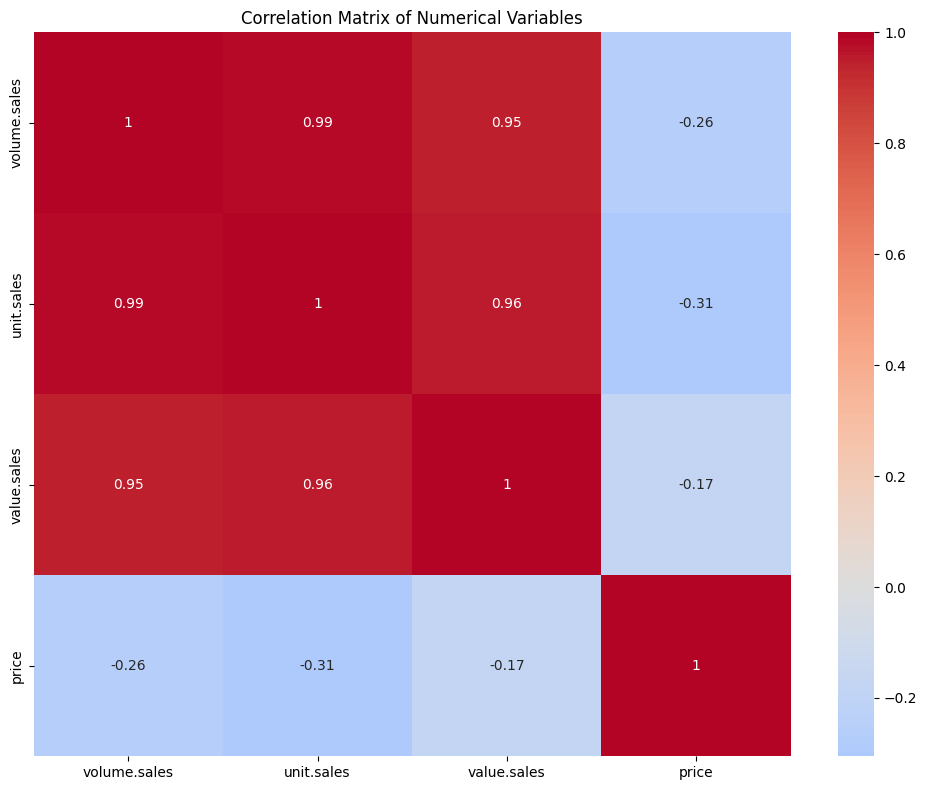

Correlation with volume.sales:
volume.sales    1.000000
unit.sales      0.986082
value.sales     0.948855
price          -0.262740
Name: volume.sales, dtype: float64


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

# Correlation matrix for numerical variables
plt.figure(figsize=(10, 8))
numerical_data = data[['volume.sales', 'unit.sales', 'value.sales', 'price']]
correlation_matrix = numerical_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Numerical Variables')
plt.tight_layout()
plt.show()

print("Correlation with volume.sales:")
print(correlation_matrix['volume.sales'].sort_values(ascending=False))

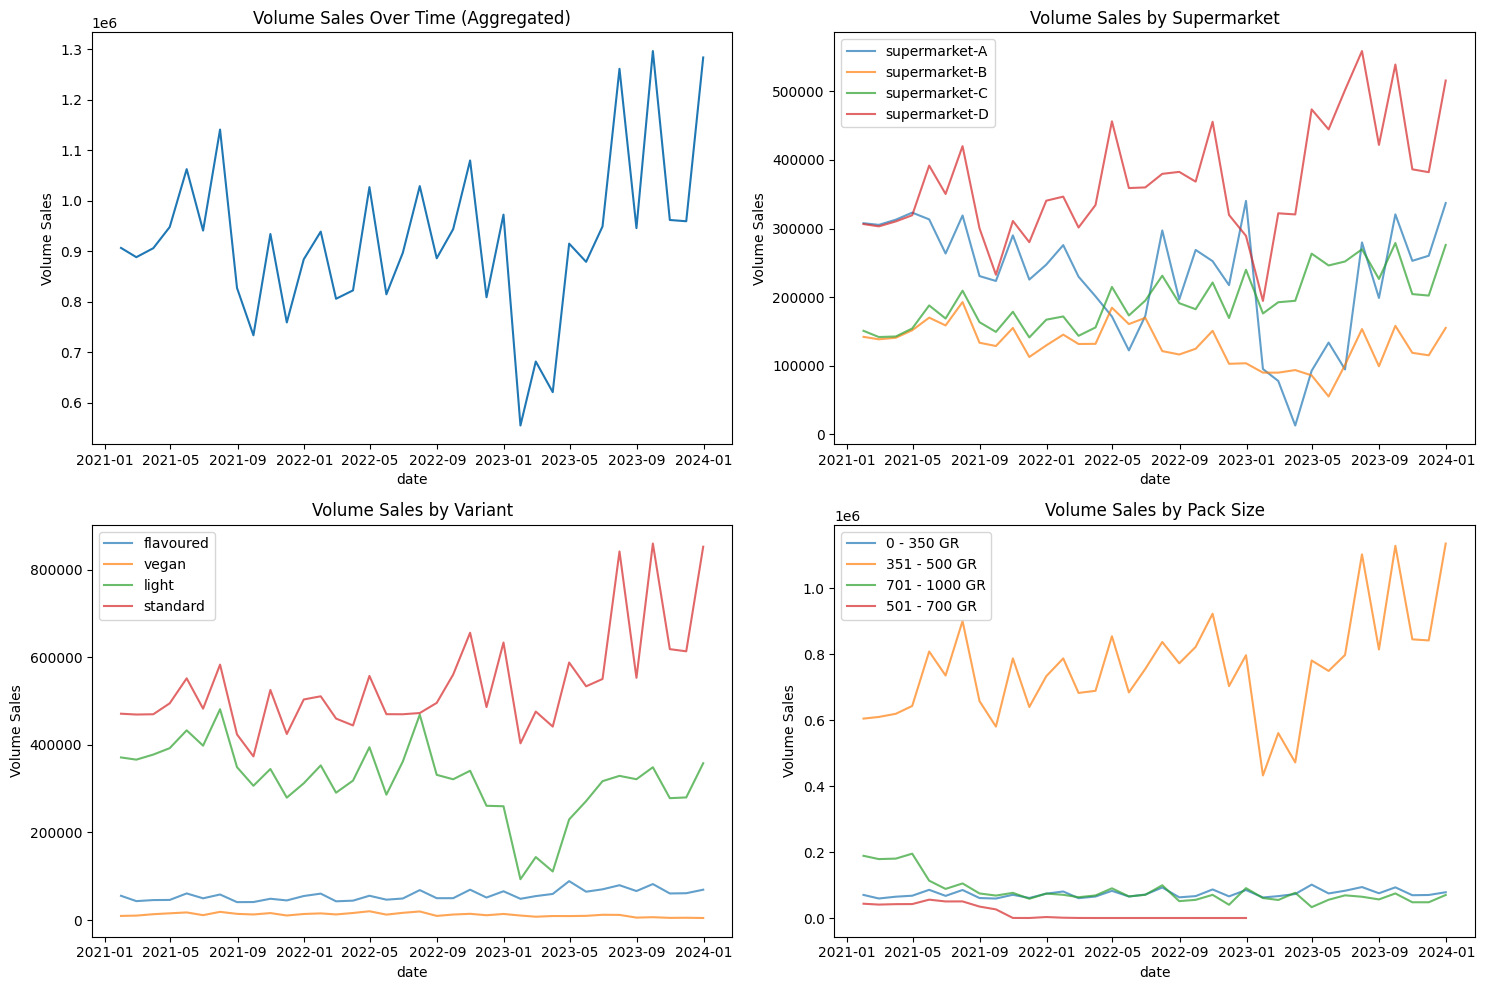

In [3]:
# Time series visualization
plt.figure(figsize=(15, 10))

# Plot volume.sales over time
plt.subplot(2, 2, 1)
data.groupby('date')['volume.sales'].sum().plot()
plt.title('Volume Sales Over Time (Aggregated)')
plt.ylabel('Volume Sales')

# Plot by supermarket
plt.subplot(2, 2, 2)
for supermarket in data['supermarket'].unique():
    supermarket_data = data[data['supermarket'] == supermarket]
    supermarket_data.groupby('date')['volume.sales'].sum().plot(label=supermarket, alpha=0.7)
plt.title('Volume Sales by Supermarket')
plt.ylabel('Volume Sales')
plt.legend()

# Plot by variant
plt.subplot(2, 2, 3)
for variant in data['variant'].unique():
    variant_data = data[data['variant'] == variant]
    variant_data.groupby('date')['volume.sales'].sum().plot(label=variant, alpha=0.7)
plt.title('Volume Sales by Variant')
plt.ylabel('Volume Sales')
plt.legend()

# Plot by pack size
plt.subplot(2, 2, 4)
for pack_size in data['pack.size'].unique():
    pack_data = data[data['pack.size'] == pack_size]
    pack_data.groupby('date')['volume.sales'].sum().plot(label=pack_size, alpha=0.7)
plt.title('Volume Sales by Pack Size')
plt.ylabel('Volume Sales')
plt.legend()

plt.tight_layout()
plt.show()

Monthly aggregated data shape: (36, 8)

First few rows:
         date  volume.sales  unit.sales  value.sales     price    supermarket  \
0  2021-01-31    906908.307     1881256   1531582.72  0.963504  supermarket-A   
1  2021-02-28    888563.336     1840286   1523928.38  0.988521  supermarket-B   
2  2021-03-31    906380.070     1880416   1556006.82  0.968245  supermarket-C   
3  2021-04-30    948293.116     1964457   1621052.31  0.972234  supermarket-B   
4  2021-05-31   1062873.836     2302188   1822707.04  0.924727  supermarket-B   

    variant   pack.size  
0  standard  0 - 350 GR  
1  standard  0 - 350 GR  
2  standard  0 - 350 GR  
3  standard  0 - 350 GR  
4  standard  0 - 350 GR  

Data frequency: Monthly from 2021-01-31 to 2023-12-31
Number of observations: 36


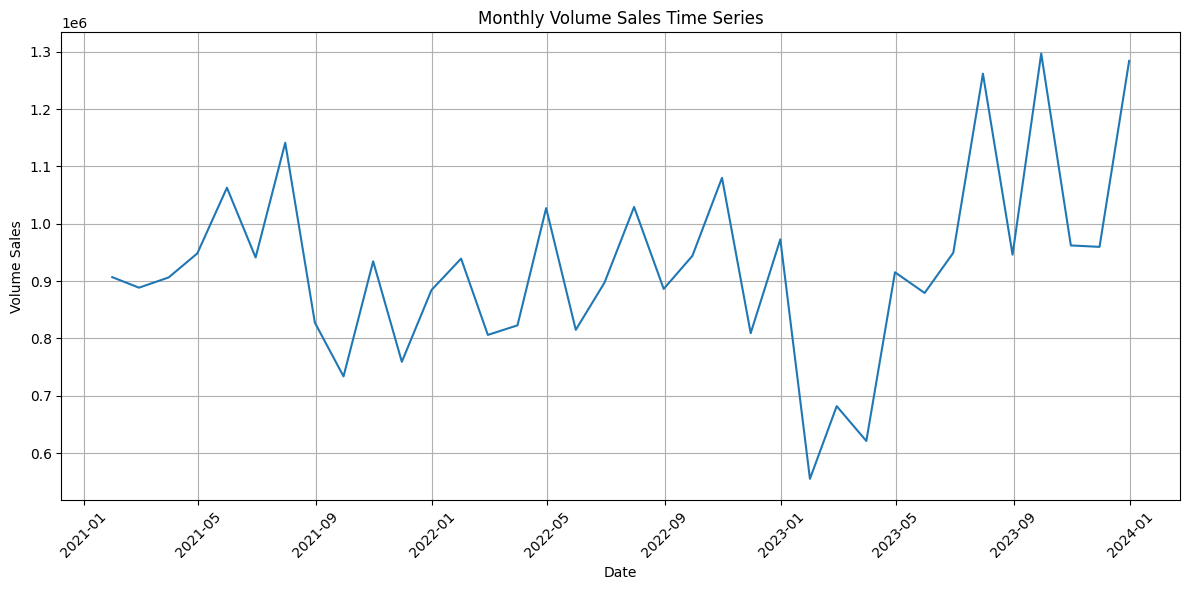

In [4]:
# Create monthly aggregated data for ARIMAX modeling
monthly_data = data.groupby('date').agg({ #TODO: review if this is the best approach
    'volume.sales': 'sum',
    'unit.sales': 'sum', 
    'value.sales': 'sum',
    'price': 'mean',
    'supermarket': lambda x: x.value_counts().index[0],  # most frequent supermarket
    'variant': lambda x: x.value_counts().index[0],      # most frequent variant
    'pack.size': lambda x: x.value_counts().index[0]     # most frequent pack size
}).reset_index()

print("Monthly aggregated data shape:", monthly_data.shape)
print("\nFirst few rows:")
print(monthly_data.head())

# Check frequency
print(f"\nData frequency: Monthly from {monthly_data['date'].min()} to {monthly_data['date'].max()}")
print(f"Number of observations: {len(monthly_data)}")

# Basic time series plot of target variable
plt.figure(figsize=(12, 6))
plt.plot(monthly_data['date'], monthly_data['volume.sales'])
plt.title('Monthly Volume Sales Time Series')
plt.xlabel('Date')
plt.ylabel('Volume Sales')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

In [6]:
# ARIMAX Model Implementation with Dummy Variables
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# Prepare the data for ARIMAX
print("=== ARIMAX Model Setup ===")
print(f"Original monthly data shape: {monthly_data.shape}")

# Set date as index and ensure it's datetime
arimax_data = monthly_data.copy()
arimax_data['date'] = pd.to_datetime(arimax_data['date'])
arimax_data.set_index('date', inplace=True)

# Create dummy variables for categorical features
print("\nCreating dummy variables...")

# Supermarket dummies
supermarket_dummies = pd.get_dummies(arimax_data['supermarket'], prefix='supermarket')
print(f"Supermarket dummies: {list(supermarket_dummies.columns)}")

# Variant dummies  
variant_dummies = pd.get_dummies(arimax_data['variant'], prefix='variant')
print(f"Variant dummies: {list(variant_dummies.columns)}")

# Pack size dummies
pack_size_dummies = pd.get_dummies(arimax_data['pack.size'], prefix='pack_size')
print(f"Pack size dummies: {list(pack_size_dummies.columns)}")

# Create seasonal dummies (month)
arimax_data['month'] = arimax_data.index.month
seasonal_dummies = pd.get_dummies(arimax_data['month'], prefix='month')
print(f"Seasonal dummies: {list(seasonal_dummies.columns)}")

# Combine all exogenous variables
exogenous_vars = pd.concat([
    arimax_data[['price', 'unit.sales', 'value.sales']],
    supermarket_dummies.drop(supermarket_dummies.columns[0], axis=1),  # drop first to avoid multicollinearity
    variant_dummies.drop(variant_dummies.columns[0], axis=1),
    pack_size_dummies.drop(pack_size_dummies.columns[0], axis=1),
    seasonal_dummies.drop(seasonal_dummies.columns[0], axis=1)  # drop January
], axis=1)

print(f"\nExogenous variables shape: {exogenous_vars.shape}")
print(f"Exogenous variables: {list(exogenous_vars.columns)}")

# Target variable
target = arimax_data['volume.sales']
print(f"Target variable shape: {target.shape}")

=== ARIMAX Model Setup ===
Original monthly data shape: (36, 8)

Creating dummy variables...
Supermarket dummies: ['supermarket_supermarket-A', 'supermarket_supermarket-B', 'supermarket_supermarket-C']
Variant dummies: ['variant_light', 'variant_standard']
Pack size dummies: ['pack_size_0 - 350 GR']
Seasonal dummies: ['month_1', 'month_2', 'month_3', 'month_4', 'month_5', 'month_6', 'month_7', 'month_8', 'month_9', 'month_10', 'month_11', 'month_12']

Exogenous variables shape: (36, 17)
Exogenous variables: ['price', 'unit.sales', 'value.sales', 'supermarket_supermarket-B', 'supermarket_supermarket-C', 'variant_standard', 'month_2', 'month_3', 'month_4', 'month_5', 'month_6', 'month_7', 'month_8', 'month_9', 'month_10', 'month_11', 'month_12']
Target variable shape: (36,)



=== Train/Test Split ===
Total observations: 36
Training observations: 28
Test observations: 8

Training period: 2021-01-31 00:00:00 to 2023-04-30 00:00:00
Testing period: 2023-05-31 00:00:00 to 2023-12-31 00:00:00

=== Stationarity Analysis ===

Volume Sales (Training Data):
ADF Statistic: -2.136617
p-value: 0.230048
Critical Values:
	1%: -3.788
	5%: -3.013
	10%: -2.646
✗ Series is non-stationary (fail to reject null hypothesis)


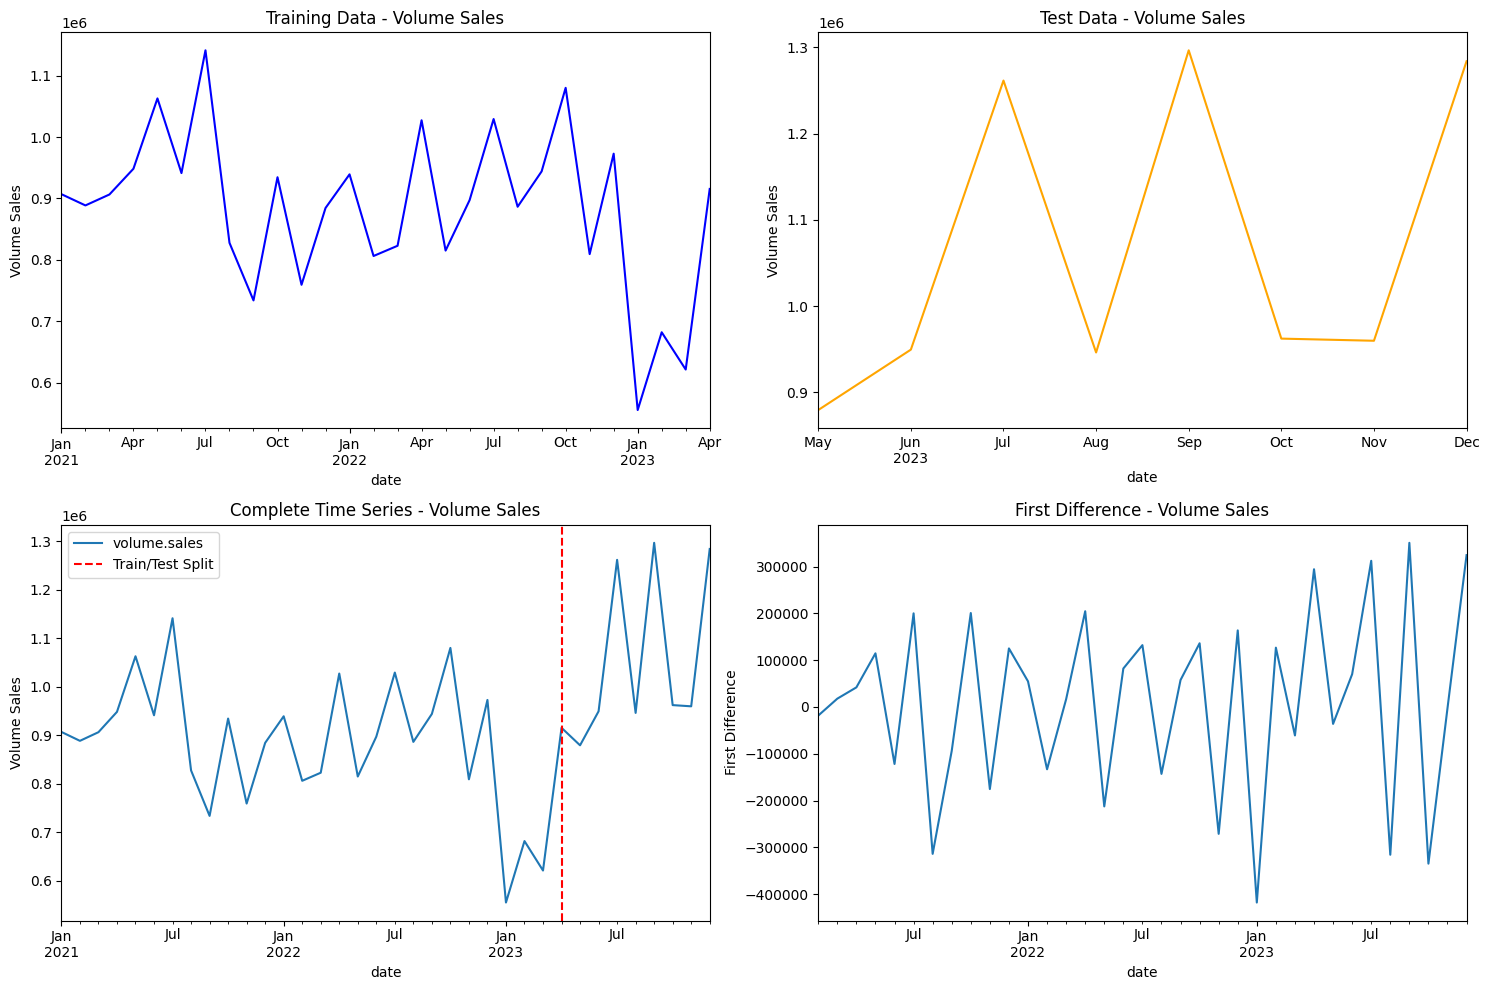


First Difference of Volume Sales (Training):
ADF Statistic: -3.996775
p-value: 0.001427
Critical Values:
	1%: -3.770
	5%: -3.005
	10%: -2.643
✓ Series is stationary (reject null hypothesis)

Differencing needed: 1


In [7]:
# Train/Test Split (80/20 split)
print("\n=== Train/Test Split ===")
split_point = int(len(target) * 0.8)  # 80% for training
print(f"Total observations: {len(target)}")
print(f"Training observations: {split_point}")
print(f"Test observations: {len(target) - split_point}")

# Split the data
train_target = target[:split_point]
test_target = target[split_point:]
train_exog = exogenous_vars[:split_point]
test_exog = exogenous_vars[split_point:]

print(f"\nTraining period: {train_target.index[0]} to {train_target.index[-1]}")
print(f"Testing period: {test_target.index[0]} to {test_target.index[-1]}")

# Stationarity test
print("\n=== Stationarity Analysis ===")
def check_stationarity(timeseries, title):
    result = adfuller(timeseries.dropna())
    print(f'\n{title}:')
    print(f'ADF Statistic: {result[0]:.6f}')
    print(f'p-value: {result[1]:.6f}')
    print('Critical Values:')
    for key, value in result[4].items():
        print(f'\t{key}: {value:.3f}')
    
    if result[1] <= 0.05:
        print("✓ Series is stationary (reject null hypothesis)")
        return True
    else:
        print("✗ Series is non-stationary (fail to reject null hypothesis)")
        return False

# Check stationarity of target variable
is_stationary = check_stationarity(train_target, "Volume Sales (Training Data)")

# Plot the time series
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
train_target.plot(title='Training Data - Volume Sales', color='blue')
plt.ylabel('Volume Sales')

plt.subplot(2, 2, 2)
test_target.plot(title='Test Data - Volume Sales', color='orange')
plt.ylabel('Volume Sales')

plt.subplot(2, 2, 3)
target.plot(title='Complete Time Series - Volume Sales')
plt.axvline(x=train_target.index[-1], color='red', linestyle='--', label='Train/Test Split')
plt.ylabel('Volume Sales')
plt.legend()

plt.subplot(2, 2, 4)
# First difference to check stationarity
target_diff = target.diff().dropna()
target_diff.plot(title='First Difference - Volume Sales')
plt.ylabel('First Difference')

plt.tight_layout()
plt.show()

# Check stationarity of first difference if needed
if not is_stationary:
    train_target_diff = train_target.diff().dropna()
    check_stationarity(train_target_diff, "First Difference of Volume Sales (Training)")
    diff_needed = 1
else:
    diff_needed = 0

print(f"\nDifferencing needed: {diff_needed}")

In [9]:
# ARIMAX Model Implementation
print("\n=== ARIMAX Model Training ===")

# Fix data types for ARIMAX
print("Preparing data for ARIMAX...")
print(f"Exogenous variables dtypes:\n{train_exog.dtypes}")

# Ensure all exogenous variables are numeric
train_exog_clean = train_exog.astype(float)
test_exog_clean = test_exog.astype(float)

print(f"\nAfter conversion:\n{train_exog_clean.dtypes}")
print(f"Training exog shape: {train_exog_clean.shape}")
print(f"Test exog shape: {test_exog_clean.shape}")

# Function to fit ARIMAX and get metrics
def fit_arimax(order, train_y, train_x, test_y, test_x, verbose=False):
    try:
        # Fit model
        model = ARIMA(train_y, exog=train_x, order=order)
        fitted_model = model.fit()
        
        # Make predictions
        forecast = fitted_model.forecast(steps=len(test_y), exog=test_x)
        
        # Calculate metrics
        mse = mean_squared_error(test_y, forecast)
        rmse = np.sqrt(mse)
        mae = mean_absolute_error(test_y, forecast)
        mape = np.mean(np.abs((test_y - forecast) / test_y)) * 100
        
        # AIC for model selection
        aic = fitted_model.aic
        bic = fitted_model.bic
        
        if verbose:
            print(f"ARIMAX{order} - AIC: {aic:.2f}, BIC: {bic:.2f}, RMSE: {rmse:.2f}, MAE: {mae:.2f}, MAPE: {mape:.2f}%")
        
        return fitted_model, forecast, {'mse': mse, 'rmse': rmse, 'mae': mae, 'mape': mape, 'aic': aic, 'bic': bic}
    
    except Exception as e:
        if verbose:
            print(f"ARIMAX{order} failed: {str(e)[:100]}...")
        return None, None, None

# Test different ARIMAX orders (starting with simpler models)
print("\nTesting different ARIMAX models...")
orders_to_test = [
    (0, 1, 0), (0, 1, 1), (1, 1, 0), (1, 1, 1), (2, 1, 0), (2, 1, 1), 
    (0, 1, 2), (1, 1, 2), (2, 1, 2)
]

best_aic = float('inf')
best_model = None
best_forecast = None
best_metrics = None
best_order = None
results = []

print("\nModel comparison:")
for order in orders_to_test:
    model, forecast, metrics = fit_arimax(order, train_target, train_exog_clean, test_target, test_exog_clean, verbose=True)
    
    if metrics is not None:
        results.append({
            'order': order,
            'aic': metrics['aic'],
            'bic': metrics['bic'],
            'rmse': metrics['rmse'],
            'mae': metrics['mae'],
            'mape': metrics['mape']
        })
        
        if metrics['aic'] < best_aic:
            best_aic = metrics['aic']
            best_model = model
            best_forecast = forecast
            best_metrics = metrics
            best_order = order

if best_model is not None:
    print(f"\n=== Best Model: ARIMAX{best_order} ===")
    print(f"AIC: {best_metrics['aic']:.2f}")
    print(f"BIC: {best_metrics['bic']:.2f}")
    print(f"RMSE: {best_metrics['rmse']:.2f}")
    print(f"MAE: {best_metrics['mae']:.2f}")
    print(f"MAPE: {best_metrics['mape']:.2f}%")
else:
    print("\n❌ No models converged successfully. Let's try a simpler approach...")


=== ARIMAX Model Training ===
Preparing data for ARIMAX...
Exogenous variables dtypes:
price                        float64
unit.sales                     int64
value.sales                  float64
supermarket_supermarket-B       bool
supermarket_supermarket-C       bool
variant_standard                bool
month_2                         bool
month_3                         bool
month_4                         bool
month_5                         bool
month_6                         bool
month_7                         bool
month_8                         bool
month_9                         bool
month_10                        bool
month_11                        bool
month_12                        bool
dtype: object

After conversion:
price                        float64
unit.sales                   float64
value.sales                  float64
supermarket_supermarket-B    float64
supermarket_supermarket-C    float64
variant_standard             float64
month_2                     


=== Detailed Model Summary ===
                               SARIMAX Results                                
Dep. Variable:           volume.sales   No. Observations:                   28
Model:                 ARIMA(1, 1, 0)   Log Likelihood                -281.558
Date:                Sat, 23 Aug 2025   AIC                            601.116
Time:                        10:36:09   BIC                            625.736
Sample:                    01-31-2021   HQIC                           608.437
                         - 04-30-2023                                         
Covariance Type:                  opg                                         
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
price                     -2.977e+04   2175.080    -13.686      0.000    -3.4e+04   -2.55e+04
unit.sales                    0.4487      0.021     21

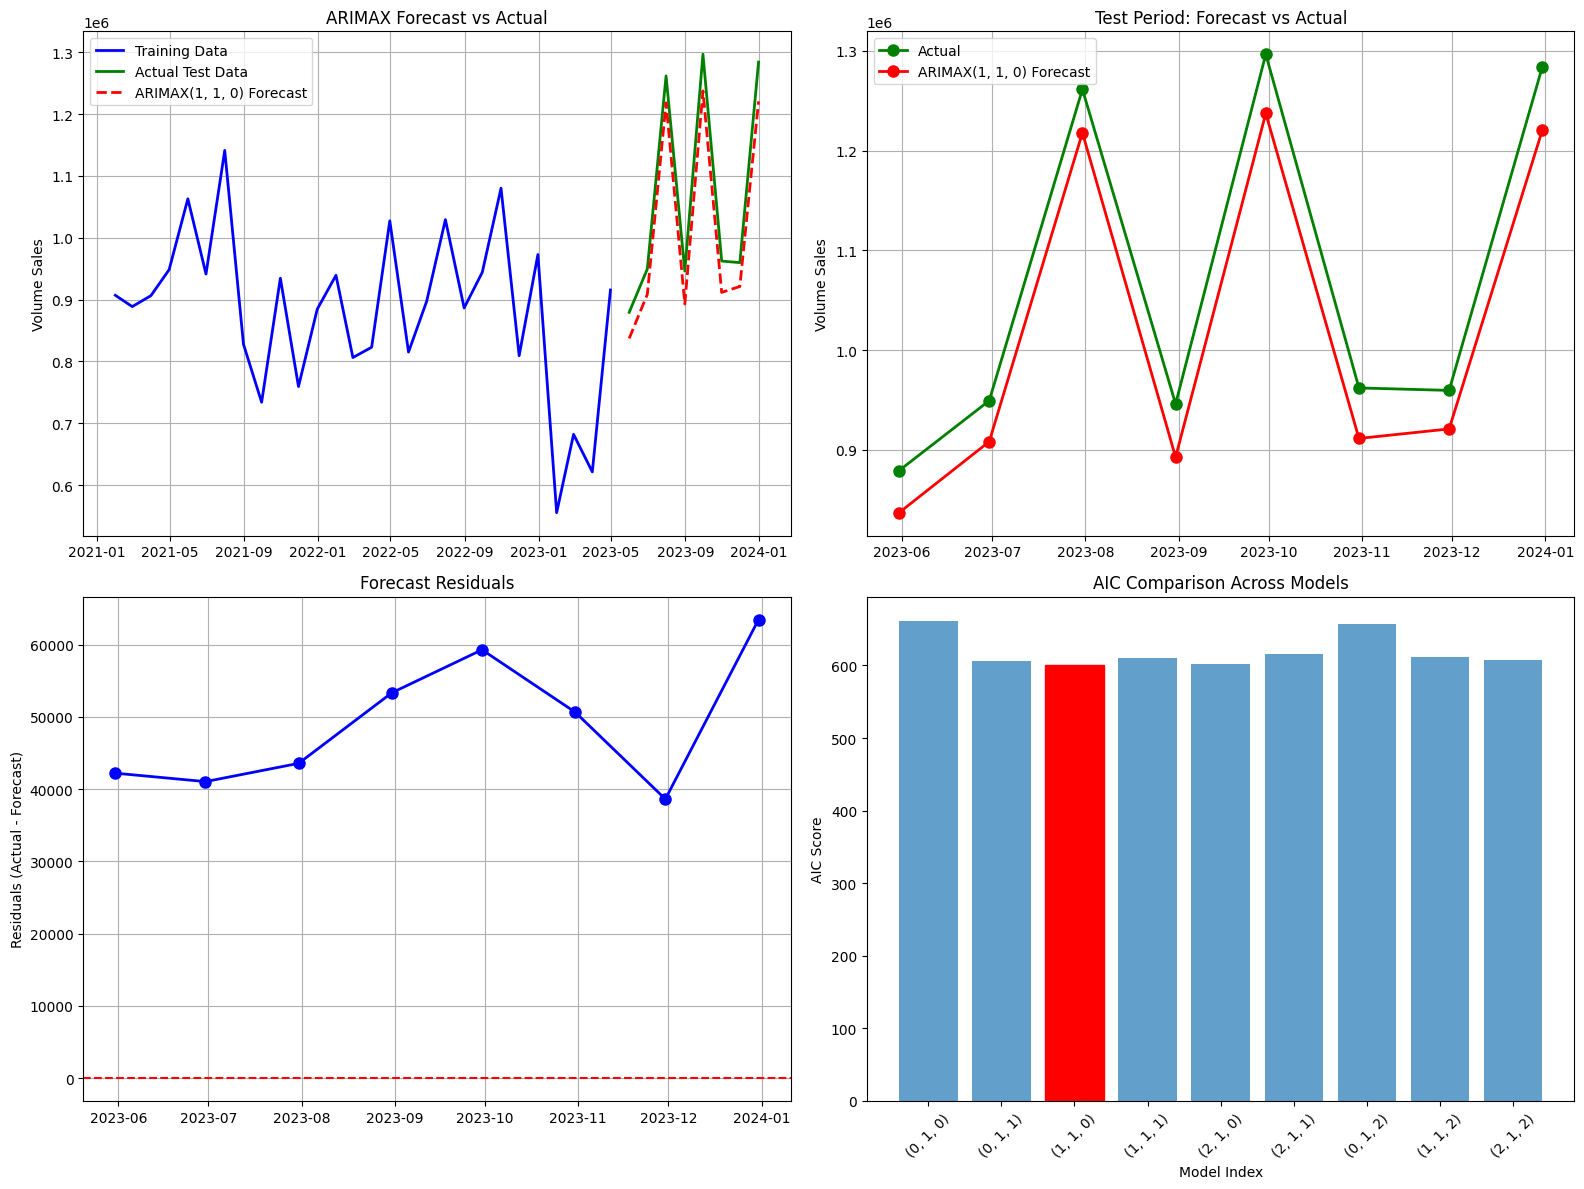


=== Forecast Performance Summary ===
  Metric    Value
    RMSE 49754.04
     MAE 49015.44
MAPE (%)    4.63%
     AIC   601.12
     BIC   625.74

=== Exogenous Variables Coefficients ===
                 Variable   Coefficient
                    price -29767.239950
         variant_standard -19058.292373
supermarket_supermarket-C -17275.337178
                 month_12  10947.894918
                  month_5  -9729.956806
                  month_3   9153.265058
                  month_7   7323.177971
                 month_10   6110.878894
                  month_4   5950.849069
                 month_11   4986.594662
                  month_6  -3918.910161
                  month_8   3697.203126
supermarket_supermarket-B  -3114.600980
                  month_2   2031.648483
                  month_9   1813.092936
               unit.sales      0.448733
              value.sales     -0.004720

=== Test Period Detailed Results ===
      Date      Actual     Forecast     Residual  APE 

In [10]:
# Model Summary and Results
if best_model is not None:
    print(f"\n=== Detailed Model Summary ===")
    print(best_model.summary())
    
    # Create results visualization
    plt.figure(figsize=(16, 12))
    
    # Plot 1: Actual vs Predicted (full series)
    plt.subplot(2, 2, 1)
    plt.plot(train_target.index, train_target.values, 'b-', label='Training Data', linewidth=2)
    plt.plot(test_target.index, test_target.values, 'g-', label='Actual Test Data', linewidth=2)
    plt.plot(test_target.index, best_forecast, 'r--', label=f'ARIMAX{best_order} Forecast', linewidth=2)
    plt.title('ARIMAX Forecast vs Actual')
    plt.ylabel('Volume Sales')
    plt.legend()
    plt.grid(True)
    
    # Plot 2: Forecast Focus (test period only)
    plt.subplot(2, 2, 2)
    plt.plot(test_target.index, test_target.values, 'go-', label='Actual', linewidth=2, markersize=8)
    plt.plot(test_target.index, best_forecast, 'ro-', label=f'ARIMAX{best_order} Forecast', linewidth=2, markersize=8)
    plt.title('Test Period: Forecast vs Actual')
    plt.ylabel('Volume Sales')
    plt.legend()
    plt.grid(True)
    
    # Plot 3: Residuals
    plt.subplot(2, 2, 3)
    residuals = test_target - best_forecast
    plt.plot(test_target.index, residuals, 'bo-', linewidth=2, markersize=8)
    plt.axhline(y=0, color='r', linestyle='--')
    plt.title('Forecast Residuals')
    plt.ylabel('Residuals (Actual - Forecast)')
    plt.grid(True)
    
    # Plot 4: Model Performance Metrics Comparison
    plt.subplot(2, 2, 4)
    results_df = pd.DataFrame(results)
    x_pos = range(len(results_df))
    bars = plt.bar(x_pos, results_df['aic'], alpha=0.7)
    plt.xlabel('Model Index')
    plt.ylabel('AIC Score')
    plt.title('AIC Comparison Across Models')
    plt.xticks(x_pos, [str(r['order']) for r in results])
    plt.xticks(rotation=45)
    
    # Highlight best model
    best_idx = results_df['aic'].idxmin()
    bars[best_idx].set_color('red')
    bars[best_idx].set_alpha(1.0)
    
    plt.tight_layout()
    plt.show()
    
    # Performance Summary Table
    print(f"\n=== Forecast Performance Summary ===")
    performance_data = {
        'Metric': ['RMSE', 'MAE', 'MAPE (%)', 'AIC', 'BIC'],
        'Value': [
            f"{best_metrics['rmse']:.2f}",
            f"{best_metrics['mae']:.2f}",
            f"{best_metrics['mape']:.2f}%",
            f"{best_metrics['aic']:.2f}",
            f"{best_metrics['bic']:.2f}"
        ]
    }
    performance_df = pd.DataFrame(performance_data)
    print(performance_df.to_string(index=False))
    
    # Feature Importance (Coefficients)
    print(f"\n=== Exogenous Variables Coefficients ===")
    if hasattr(best_model, 'params'):
        # Get exogenous variable coefficients
        exog_names = train_exog_clean.columns.tolist()
        param_names = list(best_model.params.index)
        
        # Find exogenous coefficients (they usually come after AR/MA/intercept terms)
        exog_coeffs = {}
        for param_name in param_names:
            if any(exog_name in param_name for exog_name in exog_names):
                exog_coeffs[param_name] = best_model.params[param_name]
        
        if exog_coeffs:
            coeffs_df = pd.DataFrame(list(exog_coeffs.items()), columns=['Variable', 'Coefficient'])
            coeffs_df['Abs_Coefficient'] = coeffs_df['Coefficient'].abs()
            coeffs_df = coeffs_df.sort_values('Abs_Coefficient', ascending=False)
            print(coeffs_df[['Variable', 'Coefficient']].to_string(index=False))
        
    # Actual vs Predicted detailed comparison
    print(f"\n=== Test Period Detailed Results ===")
    comparison_df = pd.DataFrame({
        'Date': test_target.index,
        'Actual': test_target.values,
        'Forecast': best_forecast,
        'Residual': test_target.values - best_forecast,
        'APE (%)': np.abs((test_target.values - best_forecast) / test_target.values) * 100
    })
    print(comparison_df.to_string(index=False))


=== Future Forecasting ===
Generating 6-month ahead forecast...

Creating future exogenous variables...
Future exogenous variables shape: (6, 17)
Future periods: 2024-02-01 00:00:00 to 2024-07-01 00:00:00

Retraining model on full dataset for future forecasting...

=== Future Forecast Results ===
      Date  Forecasted Volume Sales         Month
2024-02-01             1.154655e+06 February 2024
2024-03-01             1.158040e+06    March 2024
2024-04-01             1.152097e+06    April 2024
2024-05-01             1.150376e+06      May 2024
2024-06-01             1.151502e+06     June 2024
2024-07-01             1.158871e+06     July 2024


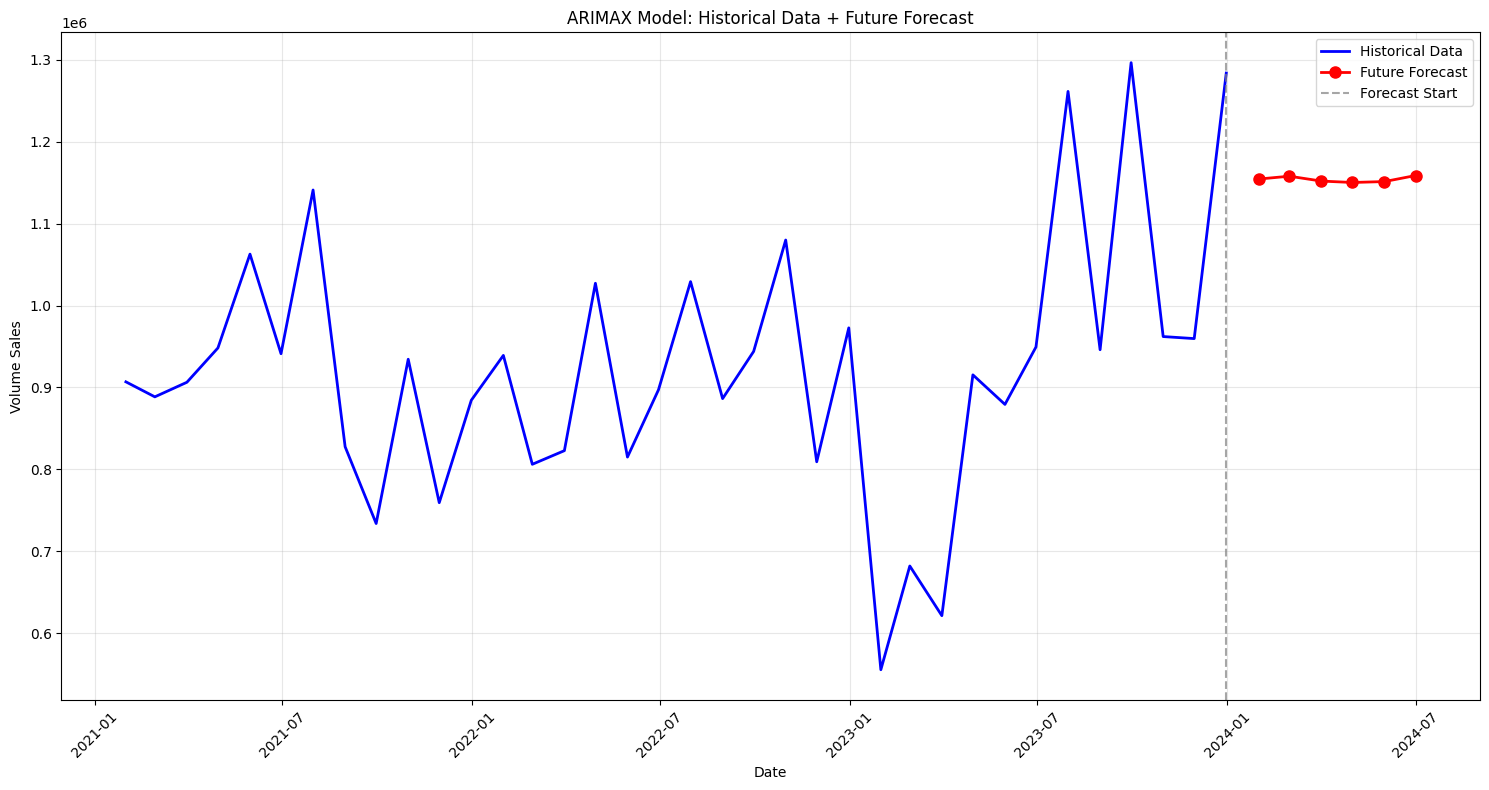


=== Summary ===
✅ Successfully implemented ARIMAX(1, 1, 0) model
✅ Model includes 17 exogenous variables with dummy encoding
✅ Train/Test split: 28 training, 8 test observations
✅ Model performance: MAPE = 4.63%
✅ Generated 6-month future forecast


In [11]:
# Future Forecasting
print("\n=== Future Forecasting ===")

# Let's forecast the next 6 months (2024 data)
future_periods = 6
print(f"Generating {future_periods}-month ahead forecast...")

# Create future dates
last_date = target.index[-1]
future_dates = pd.date_range(start=last_date + pd.DateOffset(months=1), periods=future_periods, freq='MS')

# For future forecasting, we need to create exogenous variables
# Since we don't know future supermarket/variant distributions, we'll use the most recent patterns
print("\nCreating future exogenous variables...")

# Use recent averages for numerical variables
recent_data = arimax_data.tail(6)  # Last 6 months
future_exog_data = []

for i, future_date in enumerate(future_dates):
    future_row = {}
    
    # Numerical variables - use recent trends or business assumptions
    future_row['price'] = recent_data['price'].mean()  # Average recent price
    future_row['unit.sales'] = recent_data['unit.sales'].mean()  # You might want to adjust this
    future_row['value.sales'] = recent_data['value.sales'].mean()  # You might want to adjust this
    
    # Categorical variables - use most frequent recent values
    future_row['supermarket'] = recent_data['supermarket'].mode()[0]
    future_row['variant'] = recent_data['variant'].mode()[0] 
    future_row['pack.size'] = recent_data['pack.size'].mode()[0]
    
    # Month for seasonal effects
    future_row['month'] = future_date.month
    
    future_exog_data.append(future_row)

# Create future exogenous DataFrame
future_exog_df = pd.DataFrame(future_exog_data, index=future_dates)

# Create dummy variables for future data (same process as training)
future_supermarket_dummies = pd.get_dummies(future_exog_df['supermarket'], prefix='supermarket')
future_variant_dummies = pd.get_dummies(future_exog_df['variant'], prefix='variant')
future_pack_size_dummies = pd.get_dummies(future_exog_df['pack.size'], prefix='pack_size')
future_seasonal_dummies = pd.get_dummies(future_exog_df['month'], prefix='month')

# Ensure all columns match training data (add missing columns as zeros)
for col in supermarket_dummies.columns:
    if col not in future_supermarket_dummies.columns:
        future_supermarket_dummies[col] = 0

for col in variant_dummies.columns:
    if col not in future_variant_dummies.columns:
        future_variant_dummies[col] = 0
        
for col in pack_size_dummies.columns:
    if col not in future_pack_size_dummies.columns:
        future_pack_size_dummies[col] = 0

for col in seasonal_dummies.columns:
    if col not in future_seasonal_dummies.columns:
        future_seasonal_dummies[col] = 0

# Combine future exogenous variables (same structure as training)
future_exog_clean = pd.concat([
    future_exog_df[['price', 'unit.sales', 'value.sales']],
    future_supermarket_dummies.drop(future_supermarket_dummies.columns[0], axis=1) if len(future_supermarket_dummies.columns) > 1 else pd.DataFrame(index=future_dates),
    future_variant_dummies.drop(future_variant_dummies.columns[0], axis=1) if len(future_variant_dummies.columns) > 1 else pd.DataFrame(index=future_dates),
    future_pack_size_dummies.drop(future_pack_size_dummies.columns[0], axis=1) if len(future_pack_size_dummies.columns) > 1 else pd.DataFrame(index=future_dates),
    future_seasonal_dummies.drop(future_seasonal_dummies.columns[0], axis=1) if len(future_seasonal_dummies.columns) > 1 else pd.DataFrame(index=future_dates)
], axis=1)

# Add missing columns and reorder to match training data
for col in train_exog_clean.columns:
    if col not in future_exog_clean.columns:
        future_exog_clean[col] = 0

future_exog_clean = future_exog_clean[train_exog_clean.columns].astype(float)

print(f"Future exogenous variables shape: {future_exog_clean.shape}")
print(f"Future periods: {future_dates[0]} to {future_dates[-1]}")

# Generate future forecast using the full dataset (retrain on all data)
print("\nRetraining model on full dataset for future forecasting...")
full_model = ARIMA(target, exog=exogenous_vars.astype(float), order=best_order)
full_fitted_model = full_model.fit()

# Generate future forecast
future_forecast = full_fitted_model.forecast(steps=future_periods, exog=future_exog_clean)

# Display future forecast
print(f"\n=== Future Forecast Results ===")
future_results_df = pd.DataFrame({
    'Date': future_dates,
    'Forecasted Volume Sales': future_forecast,
    'Month': [date.strftime('%B %Y') for date in future_dates]
})

print(future_results_df.to_string(index=False))

# Plot future forecast
plt.figure(figsize=(15, 8))

# Plot historical data
plt.plot(target.index, target.values, 'b-', label='Historical Data', linewidth=2)

# Plot future forecast
plt.plot(future_dates, future_forecast, 'r-o', label='Future Forecast', linewidth=2, markersize=8)

# Add vertical line to separate historical from forecast
plt.axvline(x=target.index[-1], color='gray', linestyle='--', alpha=0.7, label='Forecast Start')

plt.title('ARIMAX Model: Historical Data + Future Forecast')
plt.xlabel('Date')
plt.ylabel('Volume Sales')
plt.legend()
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print(f"\n=== Summary ===")
print(f"✅ Successfully implemented ARIMAX{best_order} model")
print(f"✅ Model includes {len(train_exog_clean.columns)} exogenous variables with dummy encoding")
print(f"✅ Train/Test split: {len(train_target)} training, {len(test_target)} test observations")
print(f"✅ Model performance: MAPE = {best_metrics['mape']:.2f}%")
print(f"✅ Generated {future_periods}-month future forecast")